# <font color = 'orange'> Student Performance Indicator

---

## <font color='blue'> Life cycle of Machine learning Project  
    
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

---

### 1. Problem statement
- This project understands how the **student's performance** (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

---

### 2. Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

---

### 2.1 Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# let's see the shape of the dataframe

df.shape

(1000, 8)

---

### 3. Data Checks

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [4]:
# checking missing values present in dataframe

df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
# checking duplicates values present in the dataframe

df.duplicated().sum()

0

In [6]:
# checking the data types and other information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# check the statistics of the dataframe

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### <font color='voilet'> Observations : 
    
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [8]:
# checking number of unique values present in each column

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
# define numerical and categorical columns

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O'] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'We have {len(numerical_features)} numerical features : {numerical_features}\n')
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [10]:
# check the unique values present in the categorical columns

for feature in categorical_features:
    print(f'Categories in {feature} feature : {df[feature].unique()}\n')

Categories in gender feature : ['female' 'male']

Categories in race_ethnicity feature : ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental_level_of_education feature : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch feature : ['standard' 'free/reduced']

Categories in test_preparation_course feature : ['none' 'completed']



---

### 4. Exploring Data and Visualization 

In [11]:
# let's see how many students got out of out

math_score_full = df[ df['math_score'] == 100 ]['math_score'].count()
reading_score_full = df[ df['reading_score'] == 100 ]['reading_score'].count()
writing_score_full = df[ df['writing_score'] == 100 ]['writing_score'].count()

print(f'Number of students got full marks in Maths : {math_score_full}')
print(f'Number of students got full marks in Reading : {reading_score_full}')
print(f'Number of students got full marks in Writing : {writing_score_full}')

Number of students got full marks in Maths : 7
Number of students got full marks in Reading : 17
Number of students got full marks in Writing : 14


In [12]:
# let's see how many students got less than 20 marks

math_score_less_20 = df[ df['math_score'] <= 20 ]['math_score'].count()
reading_score_less_20 = df[ df['reading_score'] <= 20 ]['reading_score'].count()
writing_score_less_20 = df[ df['writing_score'] <= 20 ]['writing_score'].count()

print(f'Number of students got less than 20 marks in Maths : {math_score_less_20}')
print(f'Number of students got less than 20 marks in Reading : {reading_score_less_20}')
print(f'Number of students got less than 20 marks in Writing : {writing_score_less_20}')

Number of students got less than 20 marks in Maths : 4
Number of students got less than 20 marks in Reading : 1
Number of students got less than 20 marks in Writing : 3


#### <font color='voilet'> Observations : 
    
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

---

### 4.1 w.r.t average score

In [13]:
# creating new featue 'total score' and 'average score'

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


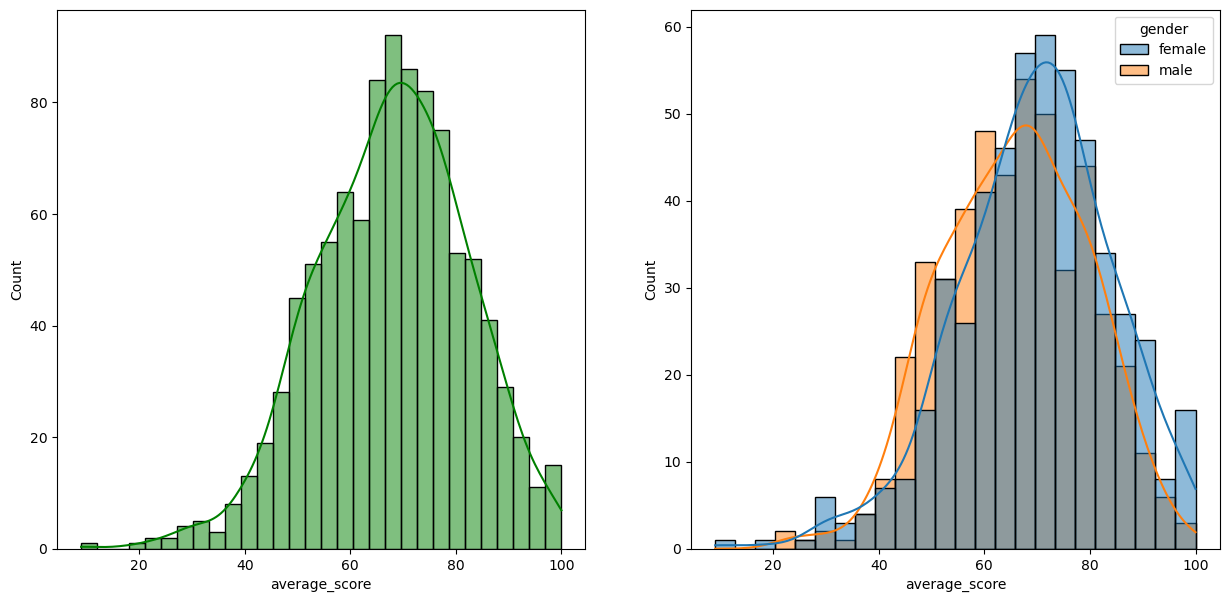

In [15]:
# let's see visualize the average score w.r.t genders

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')

plt.show()

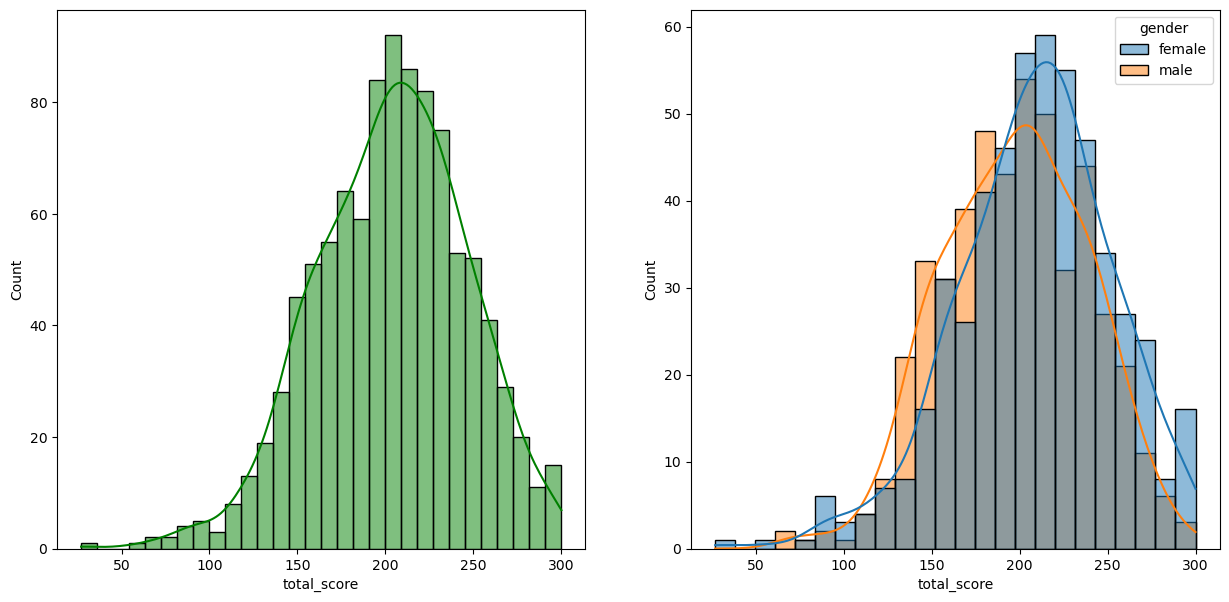

In [16]:
# let's visualize the total score w.r.t gender

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')

plt.show()

#### <font color='voilet'> Observations : 
    
- Female students tend to perform well then male students.

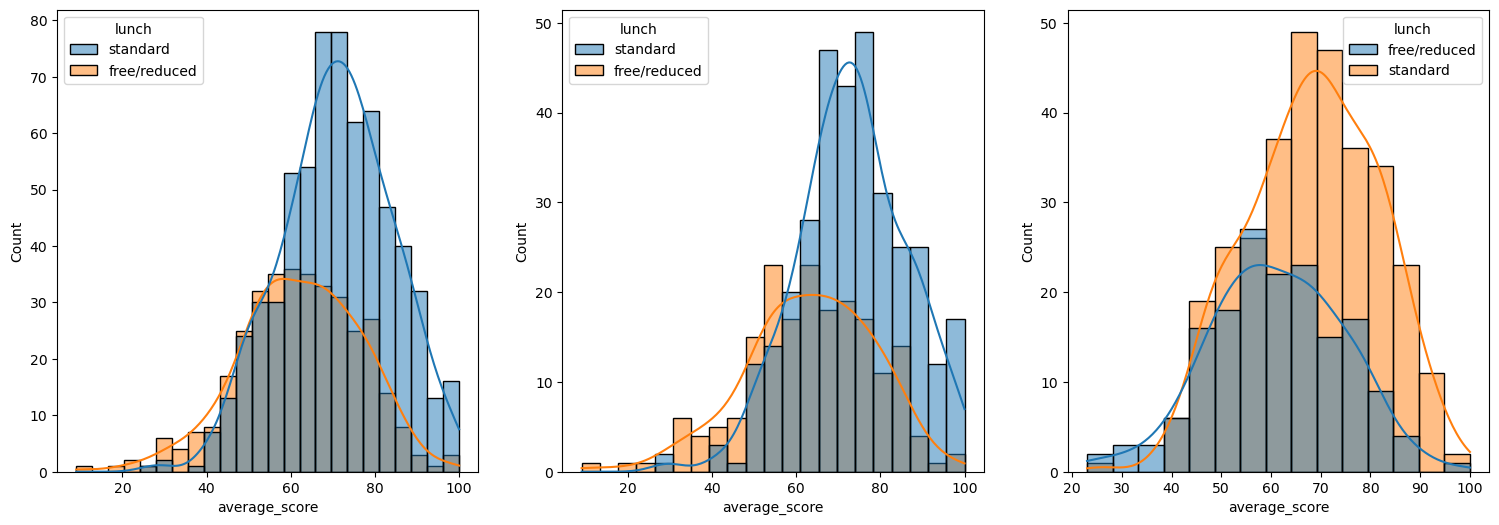

In [17]:
# let's visualize average score of male and female separetly w.r.t lunch

plt.subplots(1, 3, figsize=(25,6))

plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='lunch')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='lunch')

plt.show()

#### <font color='voilet'> Observations : 
    
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

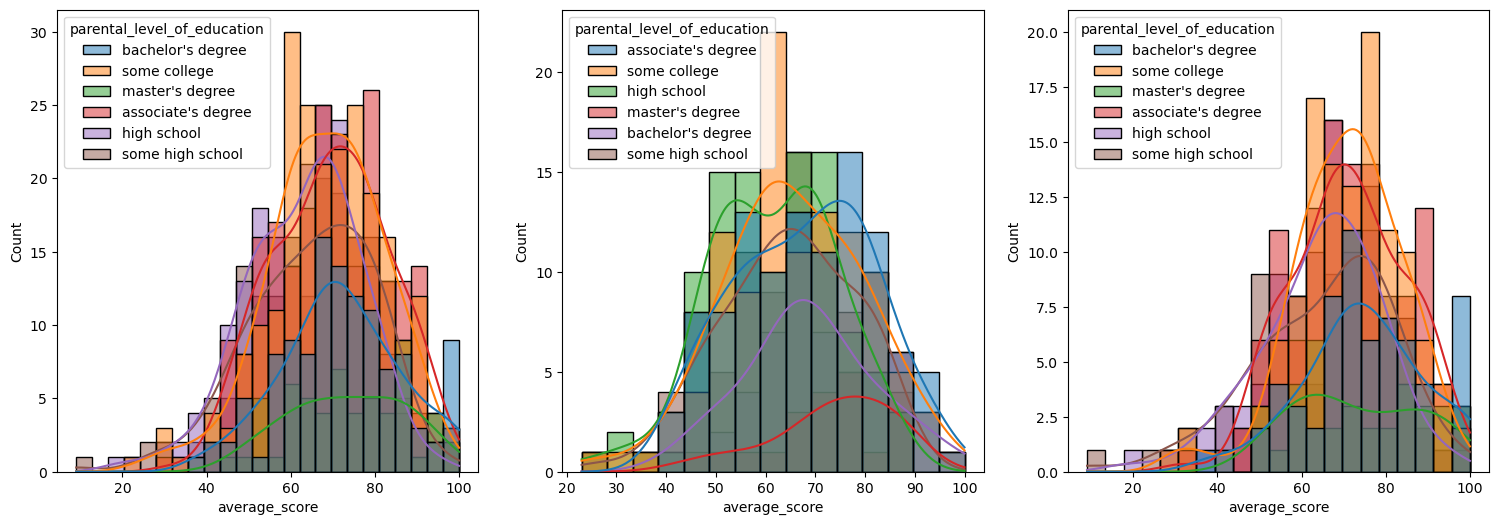

In [18]:
# let's visualize the averge score of male and female w.r.t parental level of education

plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
ax = sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education')

plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='parental_level_of_education')

plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='parental_level_of_education')

plt.show()

#### <font color='voilet'> Observations : 
    
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

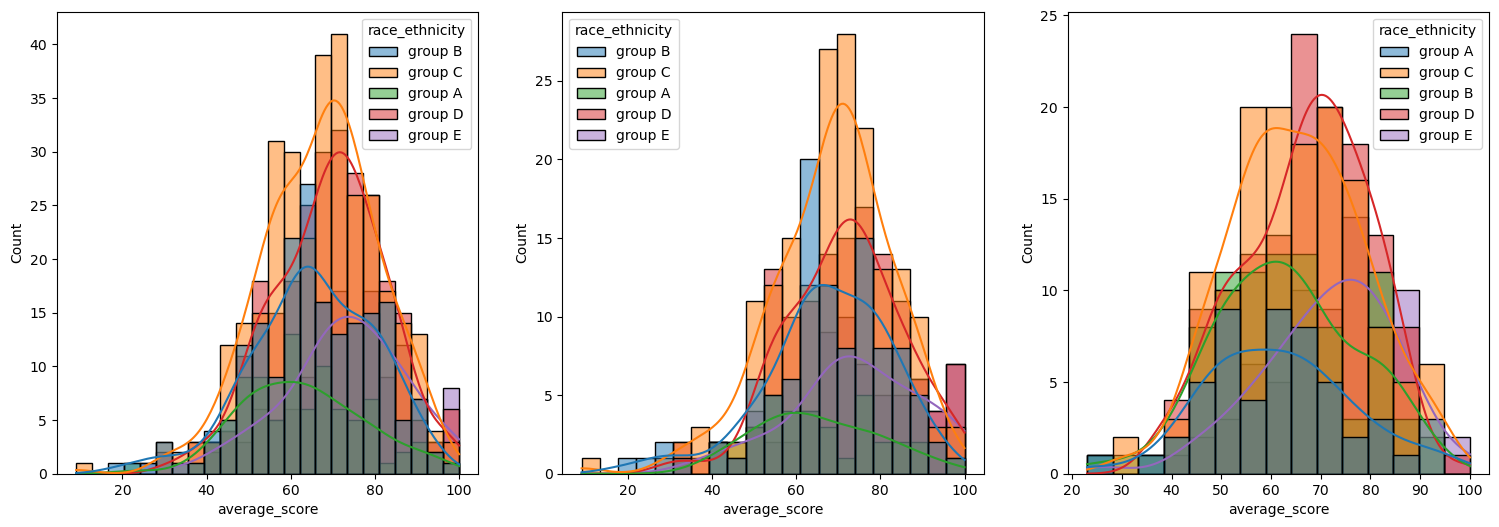

In [19]:
# let's visualize average score of male and femal w.r.t race ethicity

plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')

plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')

plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')

plt.show()

#### <font color='voilet'> Observations : 
    
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### 4.2 Maximum score of students in all 3 subjects.

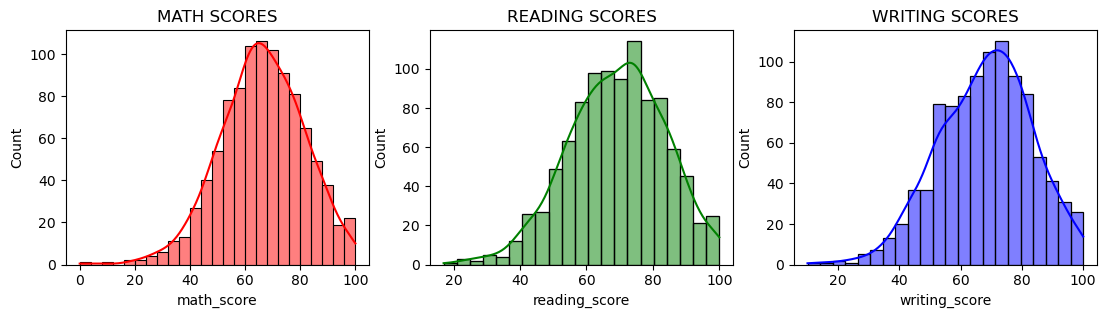

In [20]:
plt.figure(figsize=(18,14))

plt.subplot(4, 4, 1)
plt.title('MATH SCORES')
sns.histplot(x='math_score', data=df, color='red', kde = True)

plt.subplot(4, 4, 2)
plt.title('READING SCORES')
sns.histplot(x='reading_score',data=df,color='green', kde = True)

plt.subplot(4, 4, 3)
plt.title('WRITING SCORES')
sns.histplot(x='writing_score',data=df,color='blue', kde = True)

plt.show()

#### <font color='voilet'> Observations : 
    
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

---

### 4.3 Multivariate analysis using pieplot

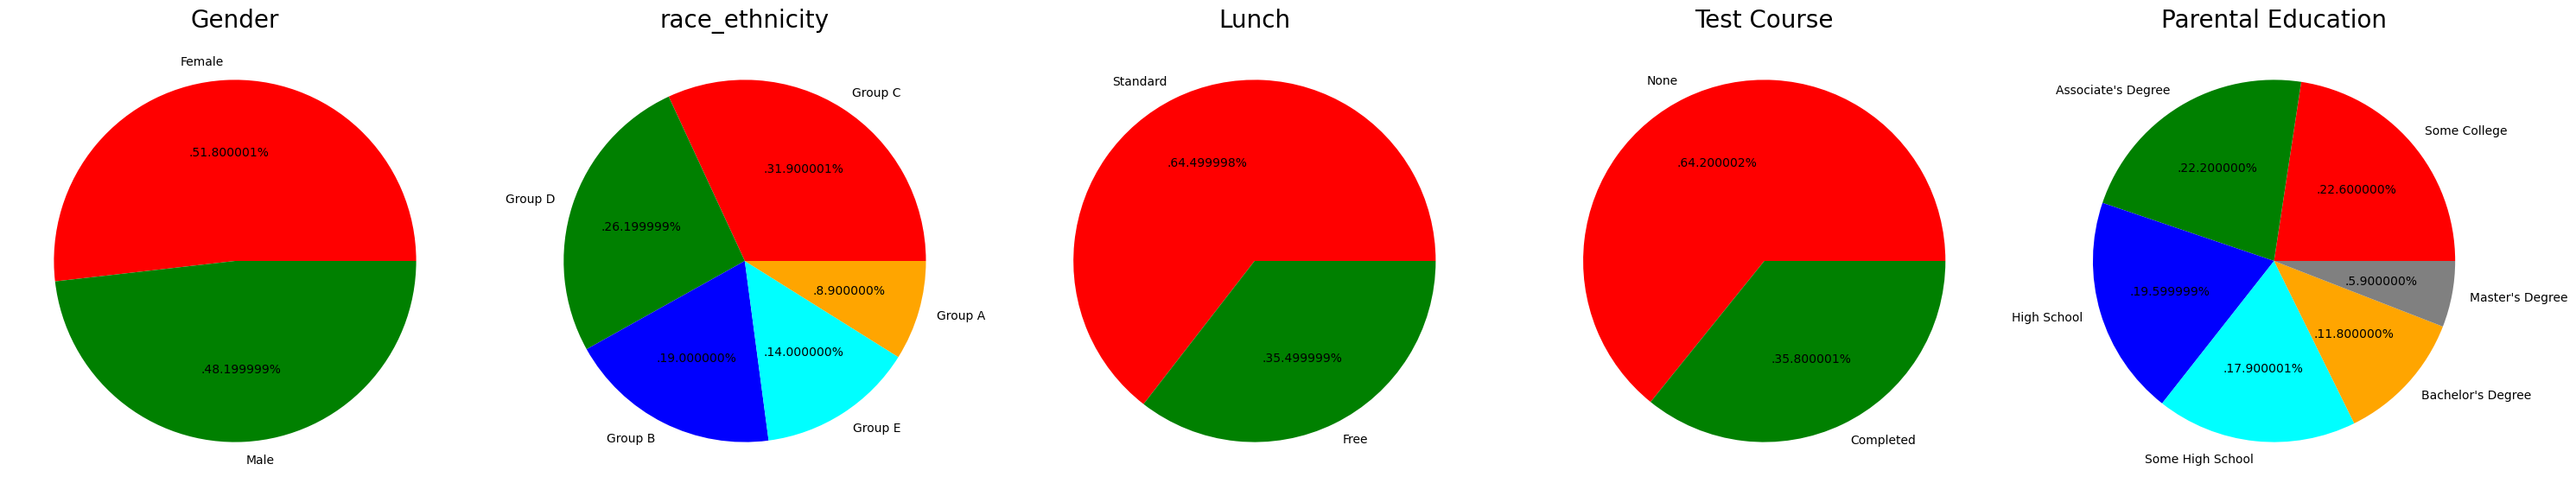

In [21]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### <font color='voilet'> Observations : 
    
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

---

### 4.4 Feature Wise Visualization  

---

#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

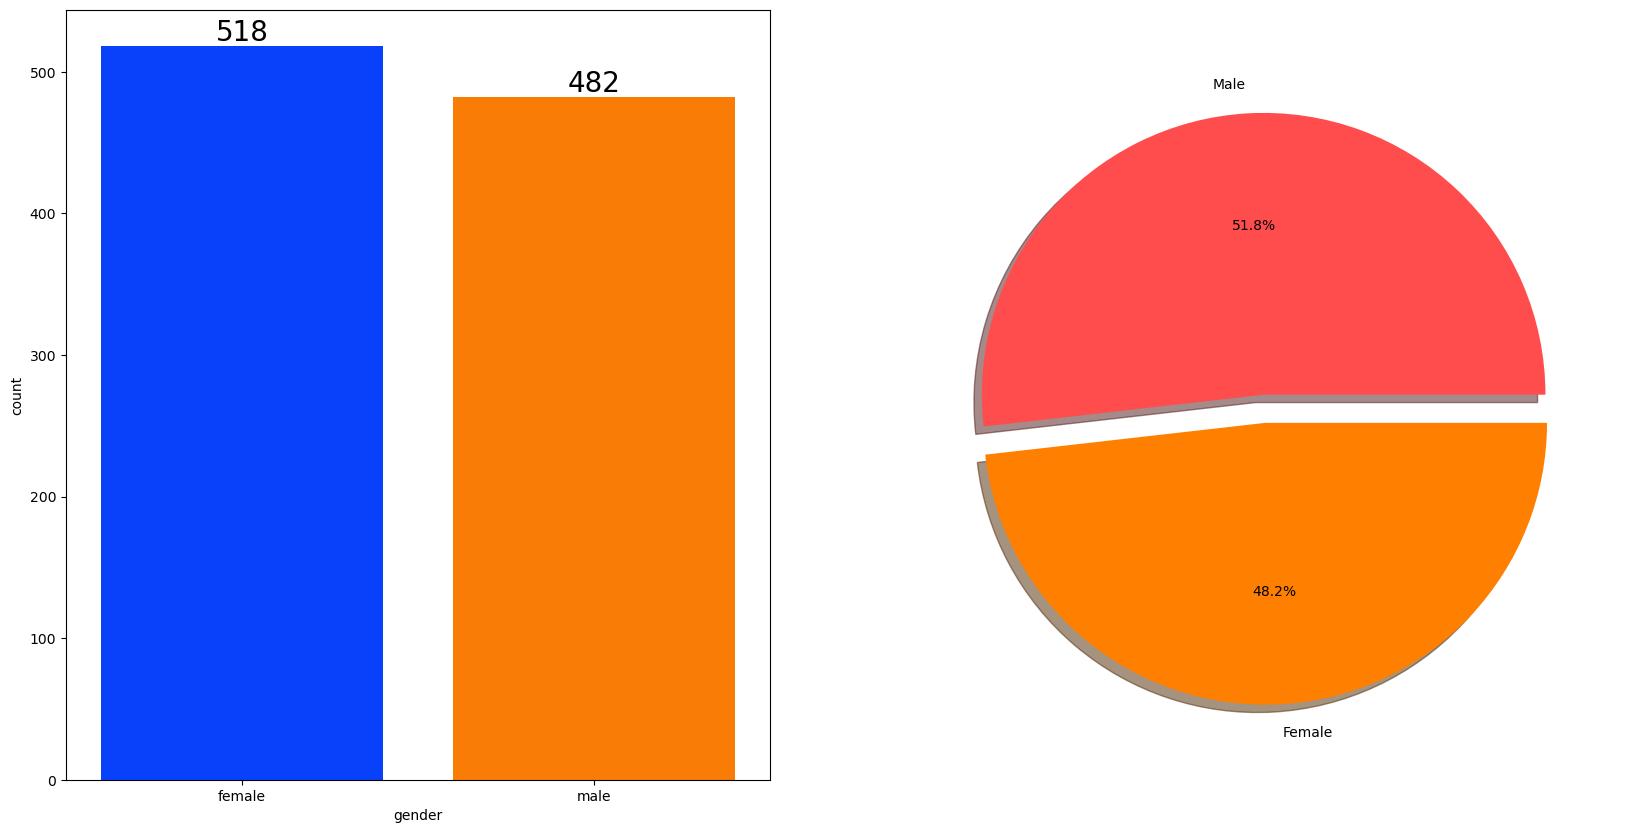

In [22]:
# UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### <font color='voilet'> Observations : 
    
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

In [23]:
gender_group = df.groupby('gender').mean()

gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


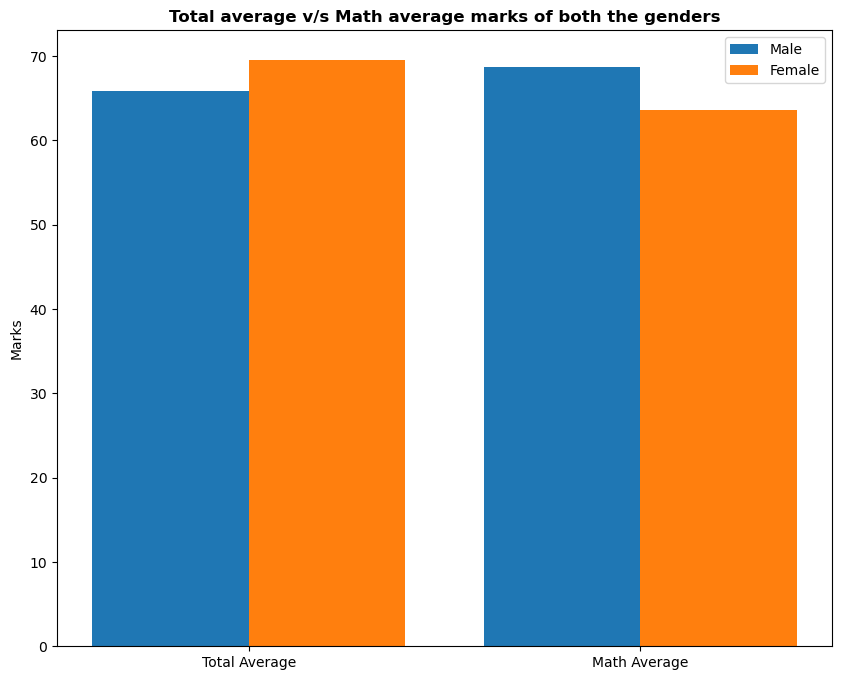

In [24]:
# BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### <font color='voilet'> Observations : 
    
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

---

#### 4.4.2 RACE_EHNICITY COLUMN
- How is Group wise distribution ?
- Is RACE_EHNICITY has any impact on student's performance ?

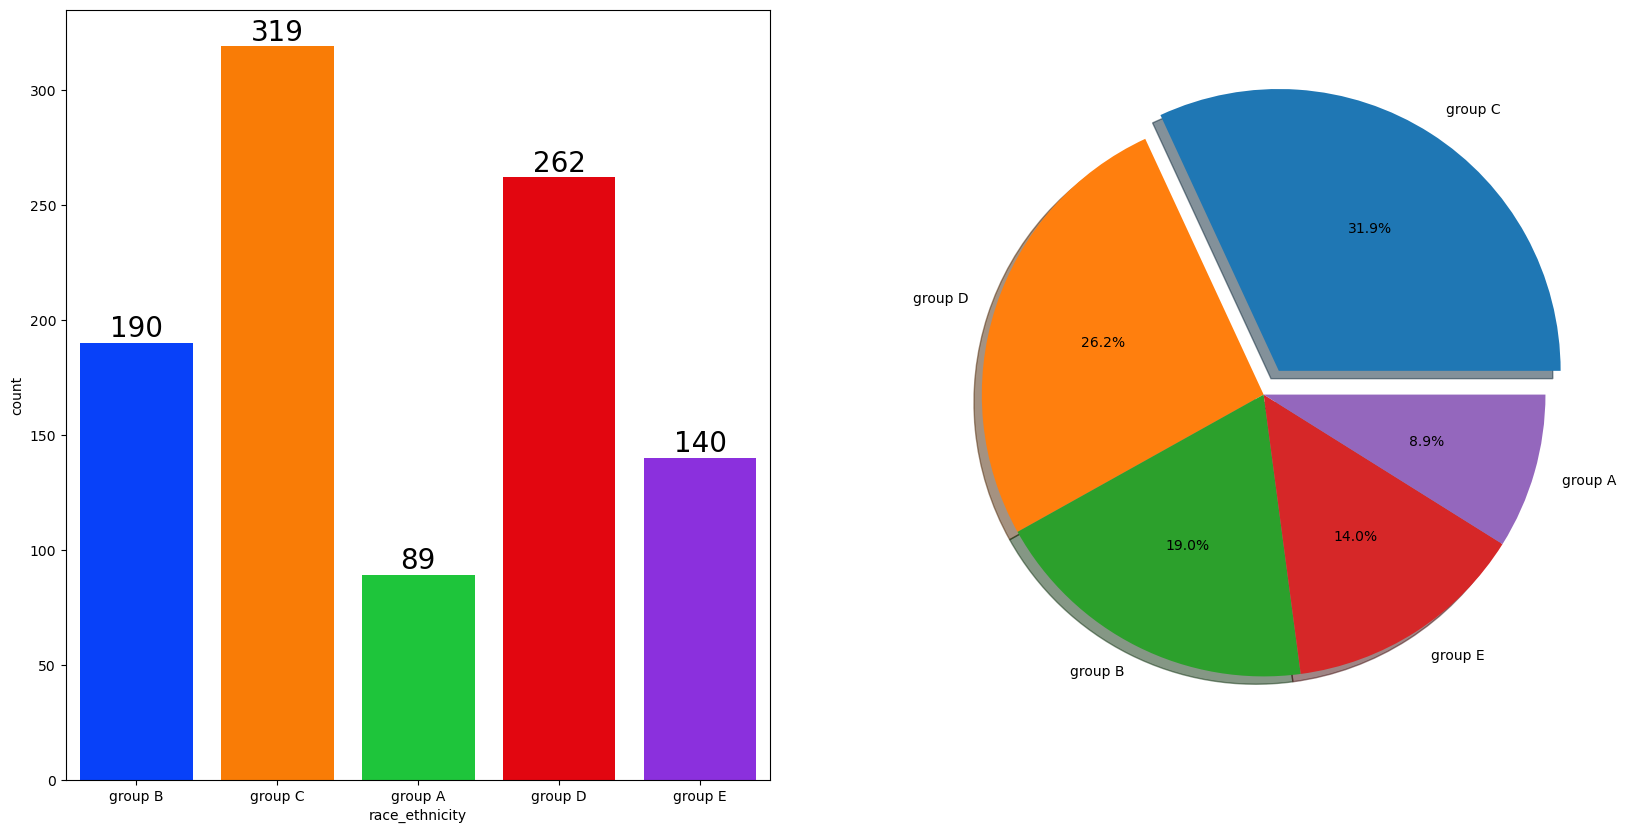

In [25]:
# UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

#### <font color='voilet'> Observations : 
    
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

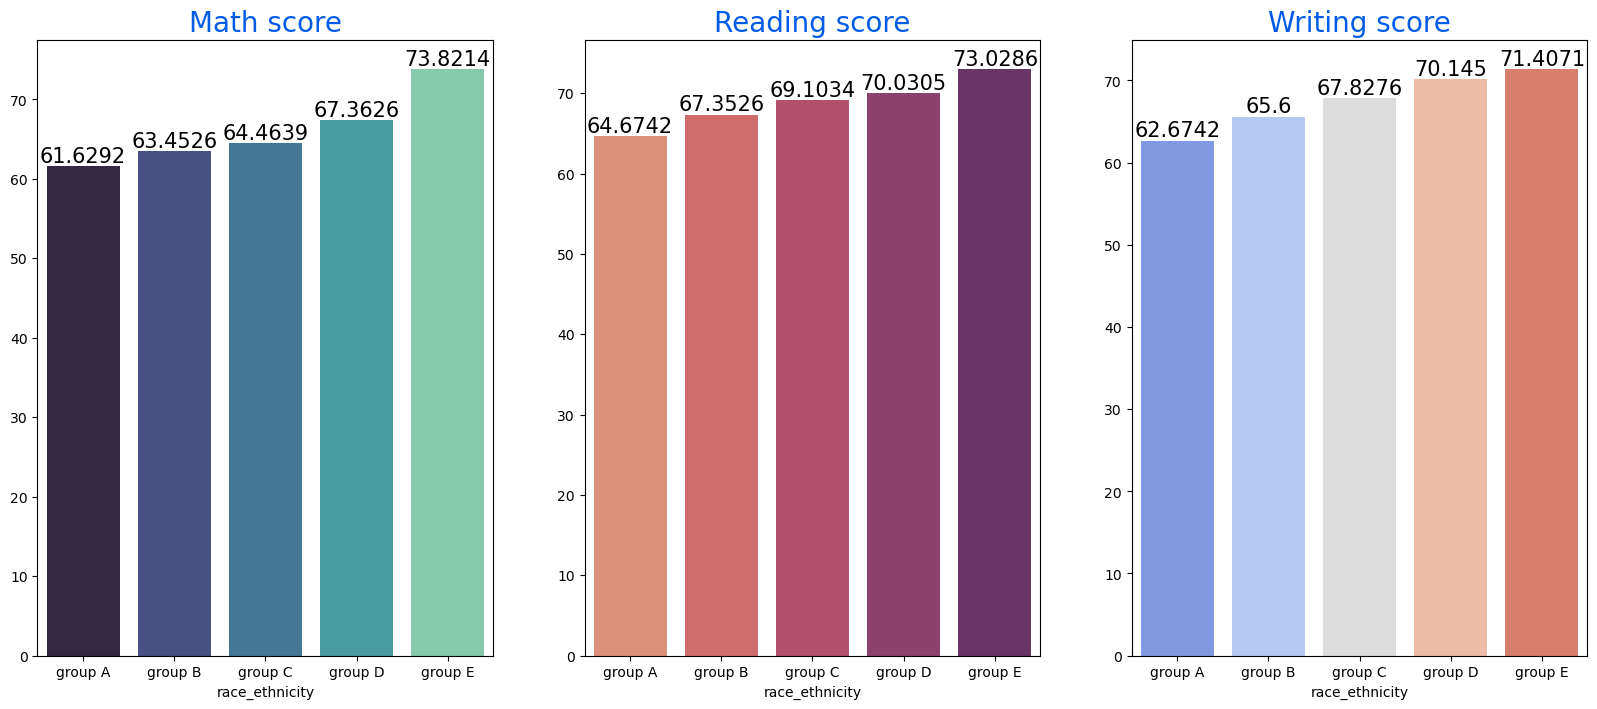

In [26]:
# BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### <font color='voilet'> Observations : 
    
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

---

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

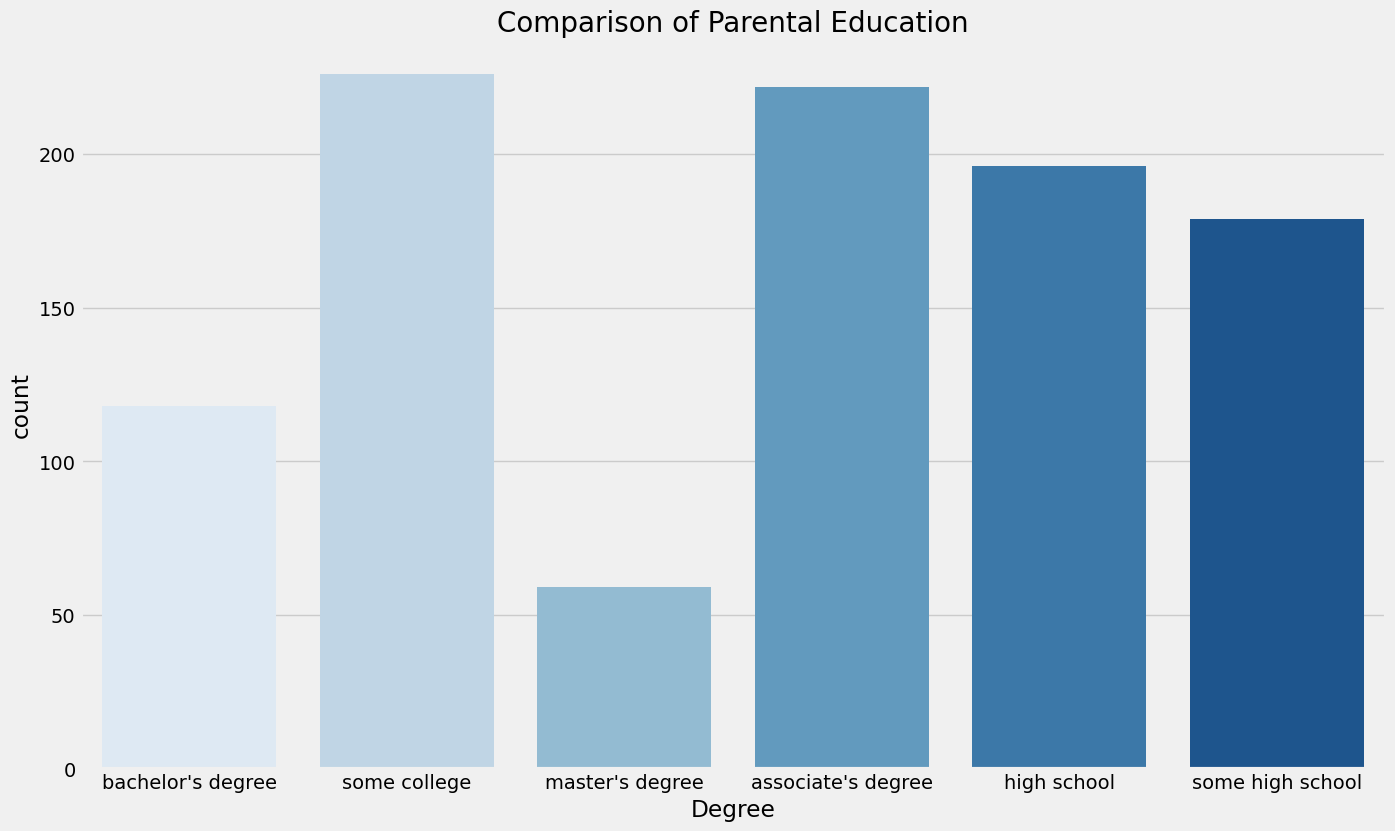

In [27]:
# UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### <font color='voilet'> Observations : 
    
- Largest number of parents are from some college.

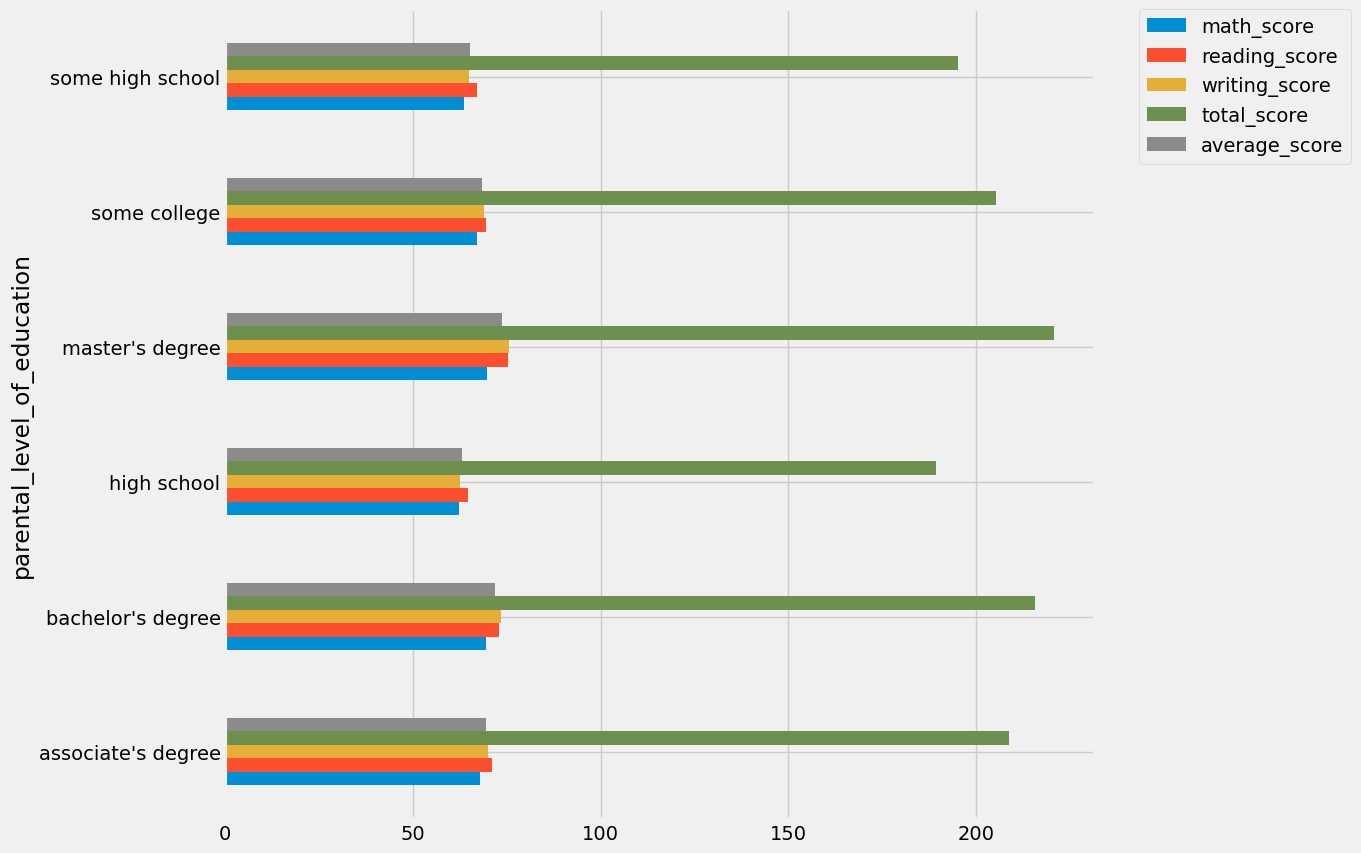

In [28]:
# BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

df.groupby('parental_level_of_education').agg('mean').plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### <font color='voilet'> Observations : 
    
- The score of student whose parents possess master and bachelor level education are higher than others.

---

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

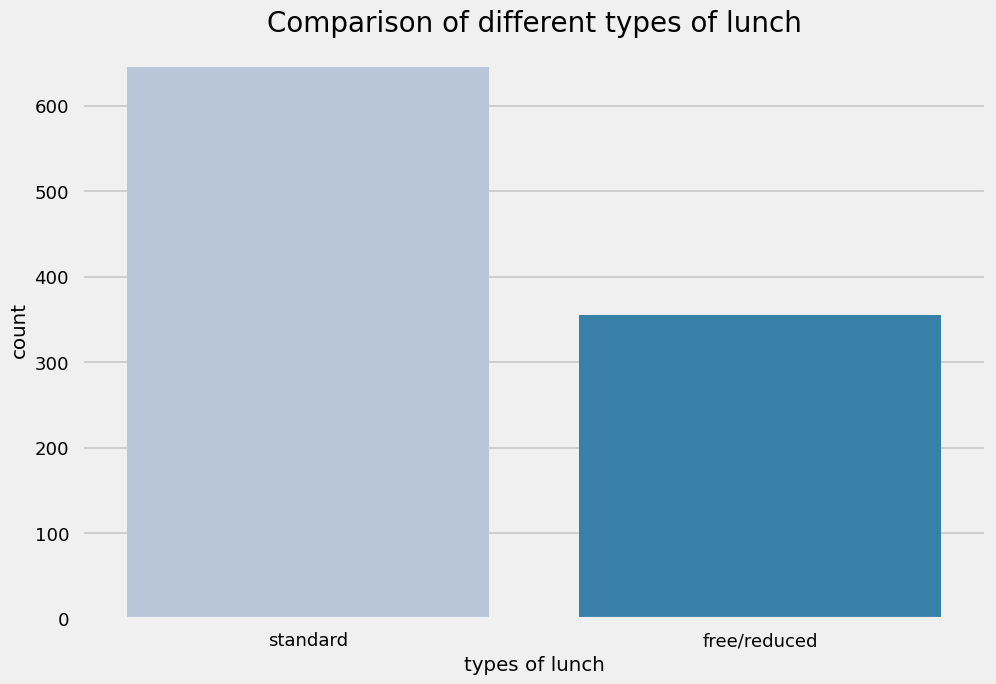

In [29]:
# UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')

plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### <font color='voilet'> Observations : 
    
- Students being served Standard lunch was more than free lunch

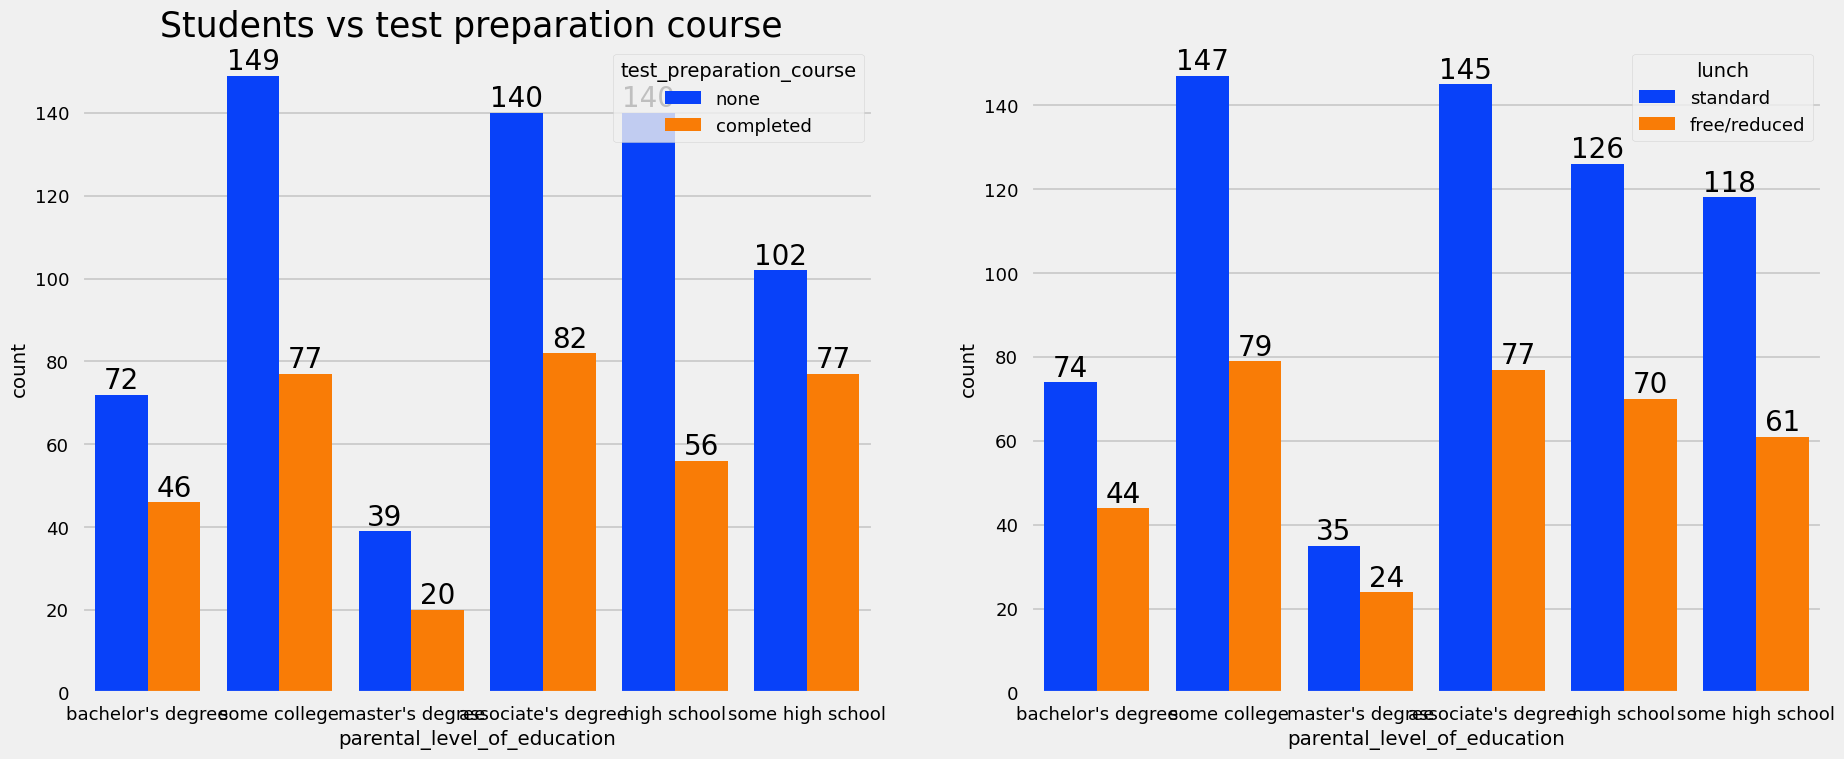

In [30]:
# BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'], data=df, palette = 'bright', hue='test_preparation_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs test preparation course ', color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
sns.countplot(x=df['parental_level_of_education'], data=df, palette = 'bright', hue='lunch', saturation=0.95, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)   

#### <font color='voilet'> Observations : 
    
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

---

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

<AxesSubplot:xlabel='lunch', ylabel='writing_score'>

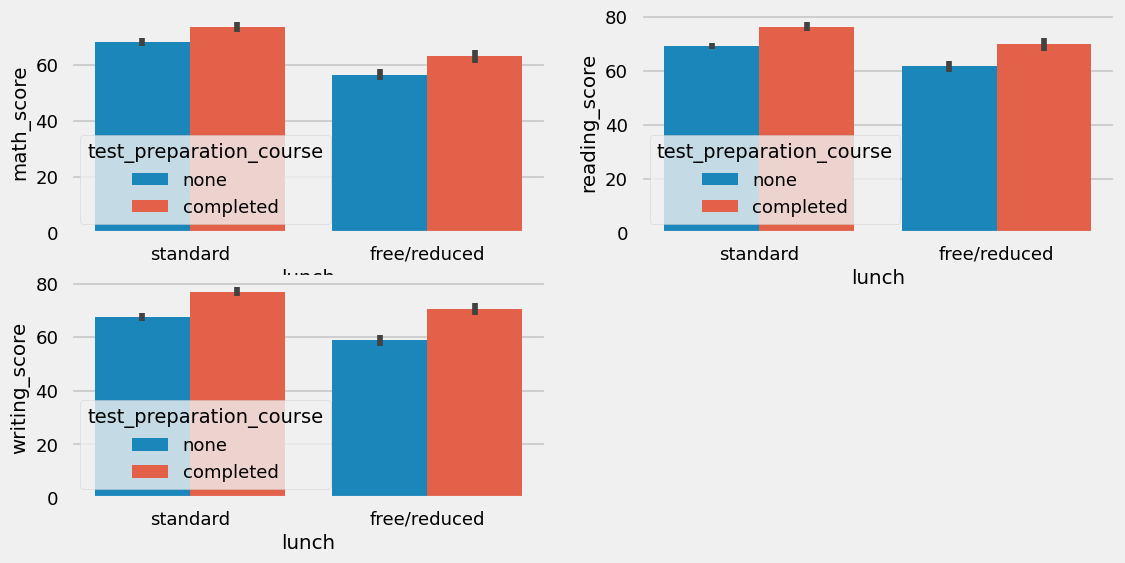

In [31]:
# BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])

plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])

plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### <font color='voilet'> Observations : 
    
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

---

#### 4.4.6 CHECKING OUTLIERS

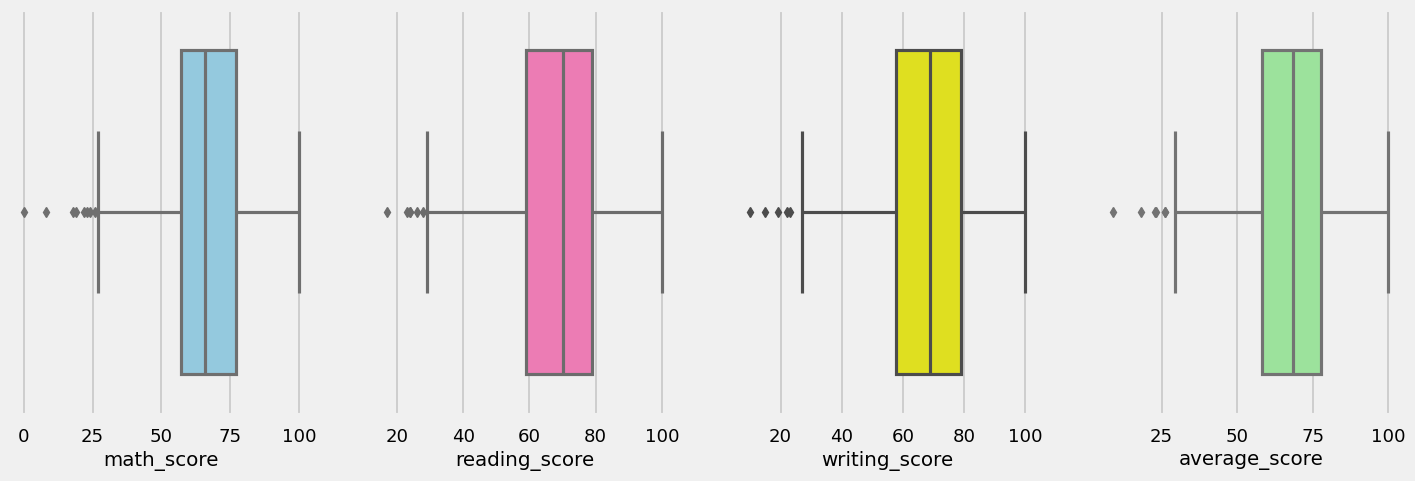

In [32]:
plt.subplots(1,4,figsize=(16,5))

plt.subplot(141)
sns.boxplot(df['math_score'], color='skyblue')

plt.subplot(142)
sns.boxplot(df['reading_score'], color='hotpink')

plt.subplot(143)
sns.boxplot(df['writing_score'], color='yellow')

plt.subplot(144)
sns.boxplot(df['average_score'], color='lightgreen')

plt.show()

---

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

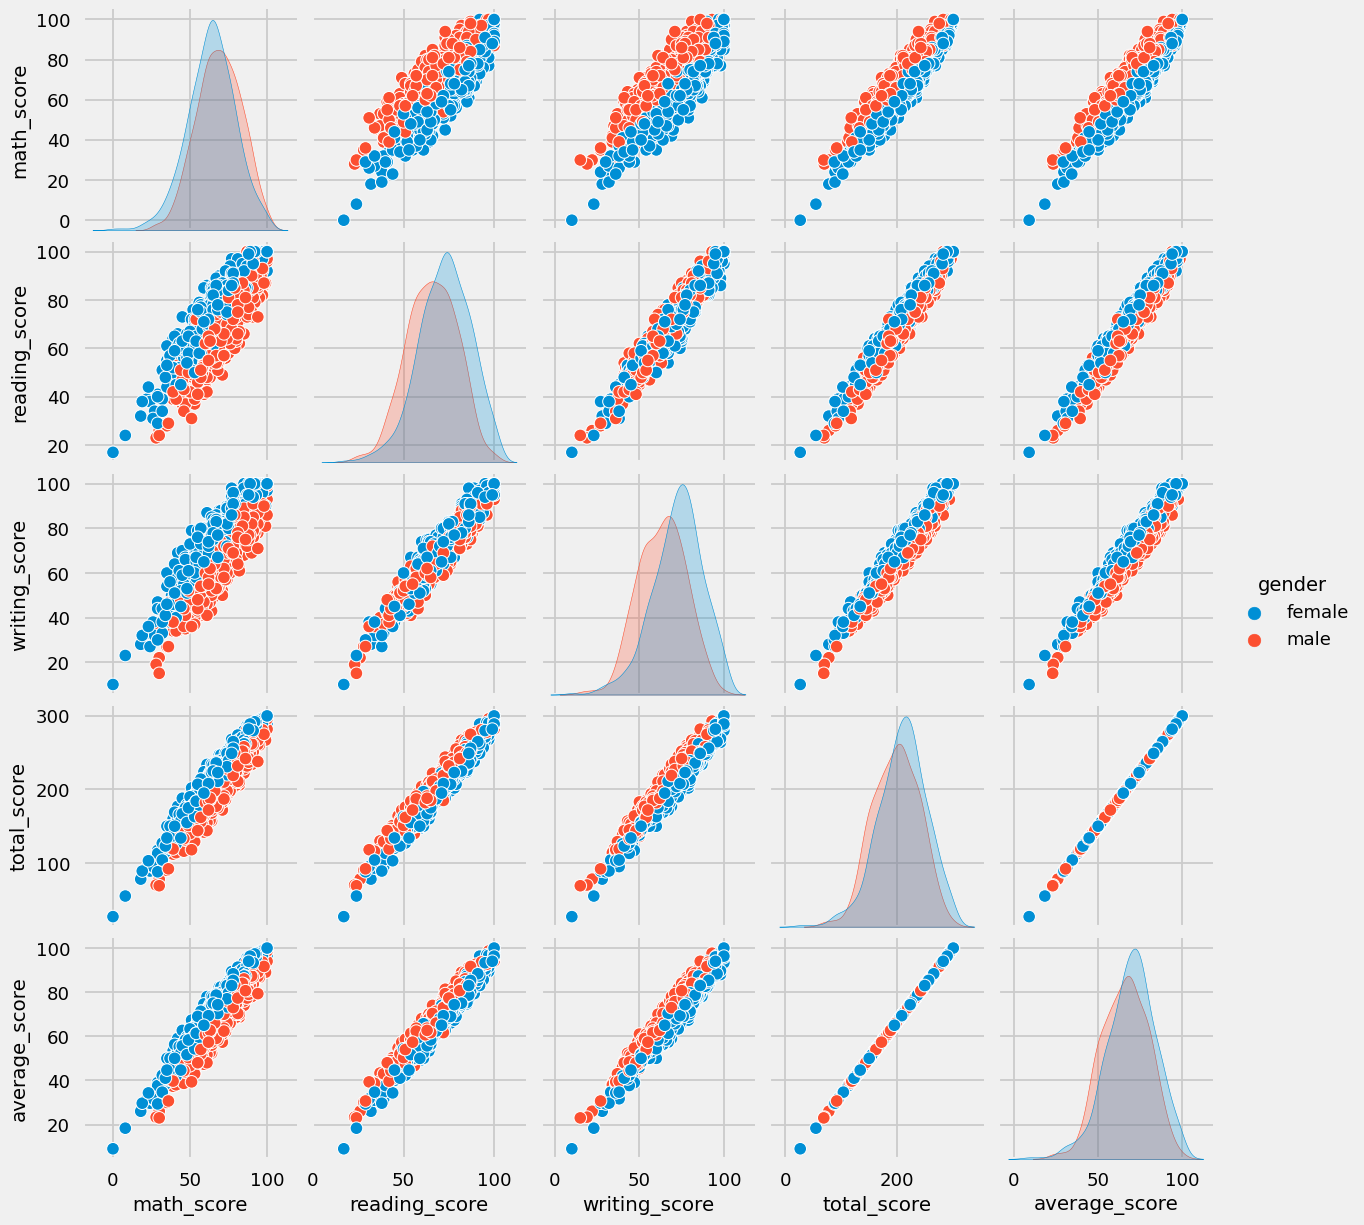

In [33]:
sns.pairplot(df, hue = 'gender')

plt.show()

#### <font color='voilet'> Observations : 
    
- From the above plot it is clear that all the scores increase linearly with each other.

---

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

---